# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.

import pandas as pd


## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [2]:
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv",
                      encoding="cp949")

df_last.shape

(3995, 5)

In [3]:
# head 로 파일을 미리보기 합니다.

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
# tail 로도 미리보기를 합니다.

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
3990,제주,전체,2019,8,3869
3991,제주,전용면적 60㎡이하,2019,8,3804
3992,제주,전용면적 60㎡초과 85㎡이하,2019,8,3884
3993,제주,전용면적 85㎡초과 102㎡이하,2019,8,NaN
3994,제주,전용면적 102㎡초과,2019,8,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [5]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.

%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8E32-2172

 C:\Users\SWH\Desktop\Python\data 디렉터리

2020-02-20  오후 04:08    <DIR>          .
2020-02-20  오후 04:08    <DIR>          ..
2020-02-20  오후 02:24       304,982,279 store_201906_01.csv
2020-02-20  오후 04:08             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2020-02-20  오후 04:08           149,663 주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv
               3개 파일         305,134,105 바이트
               2개 디렉터리  106,109,767,680 바이트 남음


In [6]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",
                      encoding = "cp949")

df_first.shape

(17, 22)

In [7]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.

df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      3995 non-null   object
 1   규모구분     3995 non-null   object
 2   연도       3995 non-null   int64 
 3   월        3995 non-null   int64 
 4   분양가격(㎡)  3750 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.2+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [10]:
True + True + False

2

In [11]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    245
dtype: int64

In [12]:
# isnull 을 통해 결측치를 구합니다.

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    245
dtype: int64

In [13]:
# isna 를 통해 결측치를 구합니다.

df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    245
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [14]:
df_last["분양가격(㎡)"].head(1)

0    5841
Name: 분양가격(㎡), dtype: object

In [15]:
type(pd.np.nan)

C:\Users\SWH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


float

In [16]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"],errors="coerce").copy()
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [17]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last[["평당분양가격", "분양가격"]].head()

,평당분양가격,분양가격
0,19275.3,5841.0
1,18651.6,5652.0
2,19410.6,5882.0
3,18879.3,5721.0
4,19400.7,5879.0


### 분양가격 요약하기

In [18]:
# info를 통해 분양가격을 봅니다.

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      3995 non-null   object 
 1   규모구분     3995 non-null   object 
 2   연도       3995 non-null   int64  
 3   월        3995 non-null   int64  
 4   분양가격(㎡)  3750 non-null   object 
 5   분양가격     3649 non-null   float64
 6   평당분양가격   3649 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 218.6+ KB


In [19]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.

df_last["분양가격(㎡)"].describe()

count     3750
unique    1653
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [20]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.

df_last["분양가격"].describe()

count     3649.000000
mean      3189.058098
std       1208.014507
min       1868.000000
25%       2409.000000
50%       2852.000000
75%       3488.000000
max      12728.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

In [21]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "").copy()

df_last["전용면적"] = df_last["전용면적"].str.replace("초과 ", "~").str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "")
df_last["전용면적"].head()

0           전체
1          60㎡
2      60㎡~85㎡
3     85㎡~102㎡
4         102㎡
Name: 전용면적, dtype: object

In [22]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      3995 non-null   object 
 1   규모구분     3995 non-null   object 
 2   연도       3995 non-null   int64  
 3   월        3995 non-null   int64  
 4   분양가격(㎡)  3750 non-null   object 
 5   분양가격     3649 non-null   float64
 6   평당분양가격   3649 non-null   float64
 7   전용면적     3995 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 249.8+ KB


In [23]:
df_last = df_last.drop(["규모구분","분양가격(㎡)"], axis=1)
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     3995 non-null   object 
 1   연도      3995 non-null   int64  
 2   월       3995 non-null   int64  
 3   분양가격    3649 non-null   float64
 4   평당분양가격  3649 non-null   float64
 5   전용면적    3995 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 187.4+ KB


### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [26]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')


## groupby 로 데이터 집계하기
groupby 를 통해 지역별 분양가격의 평균값을 구하고 그래프로 그려봅니다.
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

In [29]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


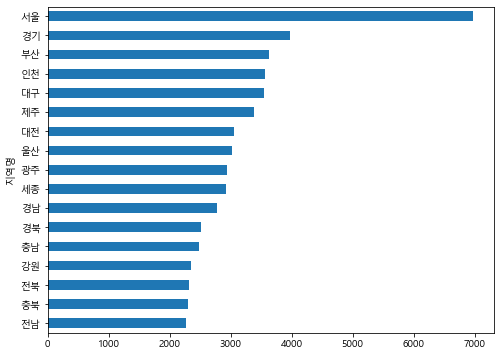

In [39]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.

group = df_last.groupby(['지역명'])['분양가격'].mean().sort_values()
group.plot.barh(figsize=(8,6))

전용면적별 분양가격의 평균값을 구하고 그래프로 그려봅니다.

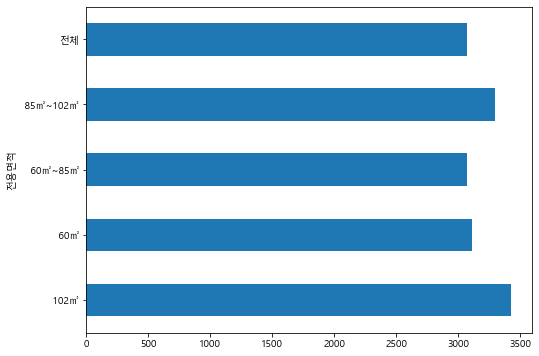

In [45]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
group2 = df_last.groupby(['전용면적'])['분양가격'].mean()
group2.plot(kind="barh",figsize=(8,6))

## box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [52]:
# unstack을 사용해야 column으로 집계가 된다.
group3 = df_last.groupby(['연도','지역명'])['분양가격'].mean().unstack()
group3

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,2178.200000,3351.800000,2563.400000,2261.866667,2399.000000,2733.000000,2482.000000,3144.666667,6156.266667,2656.066667,2838.666667,3326.066667,2060.266667,2154.666667,2409.416667,2330.266667,2069.333333
2016,2170.576923,3540.900000,2574.766667,2349.516667,2785.055556,3115.766667,2700.222222,3255.616667,6591.950000,2684.183333,2903.810345,3363.350000,2102.000000,2092.916667,2899.236364,2411.583333,2161.616667
2017,2204.109091,3728.781818,2662.654545,2509.333333,2913.326531,3699.000000,3017.320755,3503.236364,6615.472727,2767.425926,3232.404762,3527.454545,2234.218182,2242.113208,3808.100000,2484.370370,2264.581818
2018,2490.683333,4320.733333,2826.566667,2630.538462,2886.955556,3678.561404,3101.244444,3906.050000,7030.983333,3133.473684,3103.454545,3600.464286,2402.983333,2477.150000,3616.960000,2485.400000,2469.483333
2019,2634.875000,4688.075000,3212.575000,2680.950000,3549.964286,4149.250000,3844.851852,4093.150000,8225.550000,3355.742857,NaN,3956.500000,2442.625000,2585.500000,3508.157895,2624.805556,2419.325000


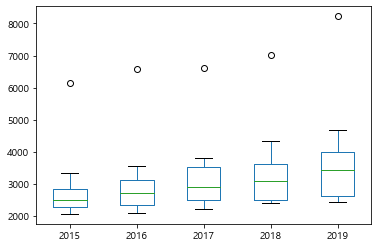

In [55]:
group4 = group3.T
group4.plot.box()

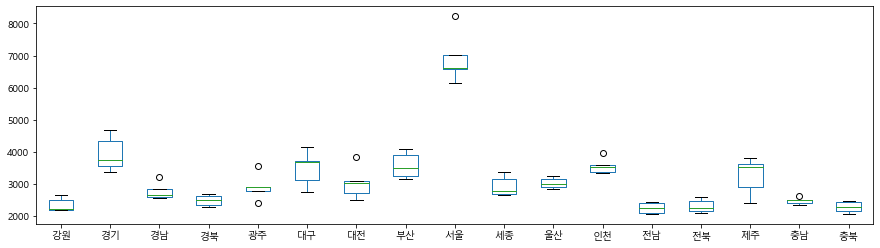

In [56]:
group3.plot.box(figsize=(15,4))

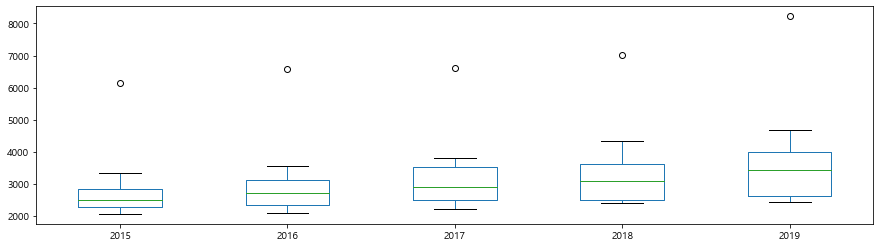

In [58]:
# T == transpose()
group3.T.plot.box(figsize=(15,4))

### Seaborn 으로 시각화 해보기

In [69]:
import seaborn as sns
sns.barplot?

<Figure size 1080x288 with 0 Axes>

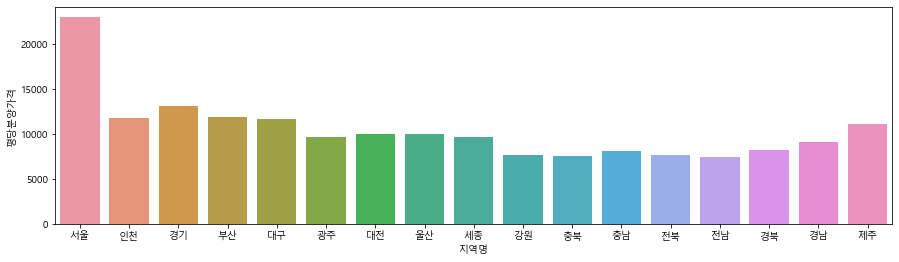

In [72]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(15,4))
g = sns.barplot(data=df_last, x='지역명', y='평당분양가격', ci=None)
# ci연산은 오래걸리기 때문에 빠르게 시각화하기 위해선 ci옵션을 제거하는 것을 권장

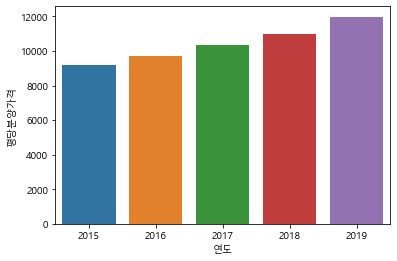

In [73]:
# barplot으로 연도별 평당분양가격을 그려봅니다.

sns.barplot(data=df_last, x='연도', y='평당분양가격', ci=None)

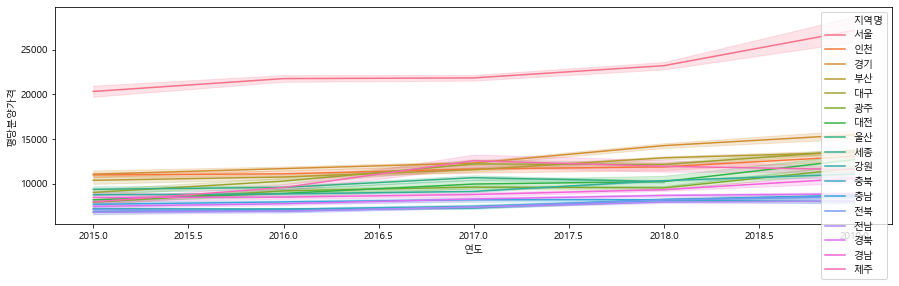

In [88]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(15,4))
sns.lineplot(data=df_last, x='연도', y='평당분양가격',hue='지역명',legend='brief')

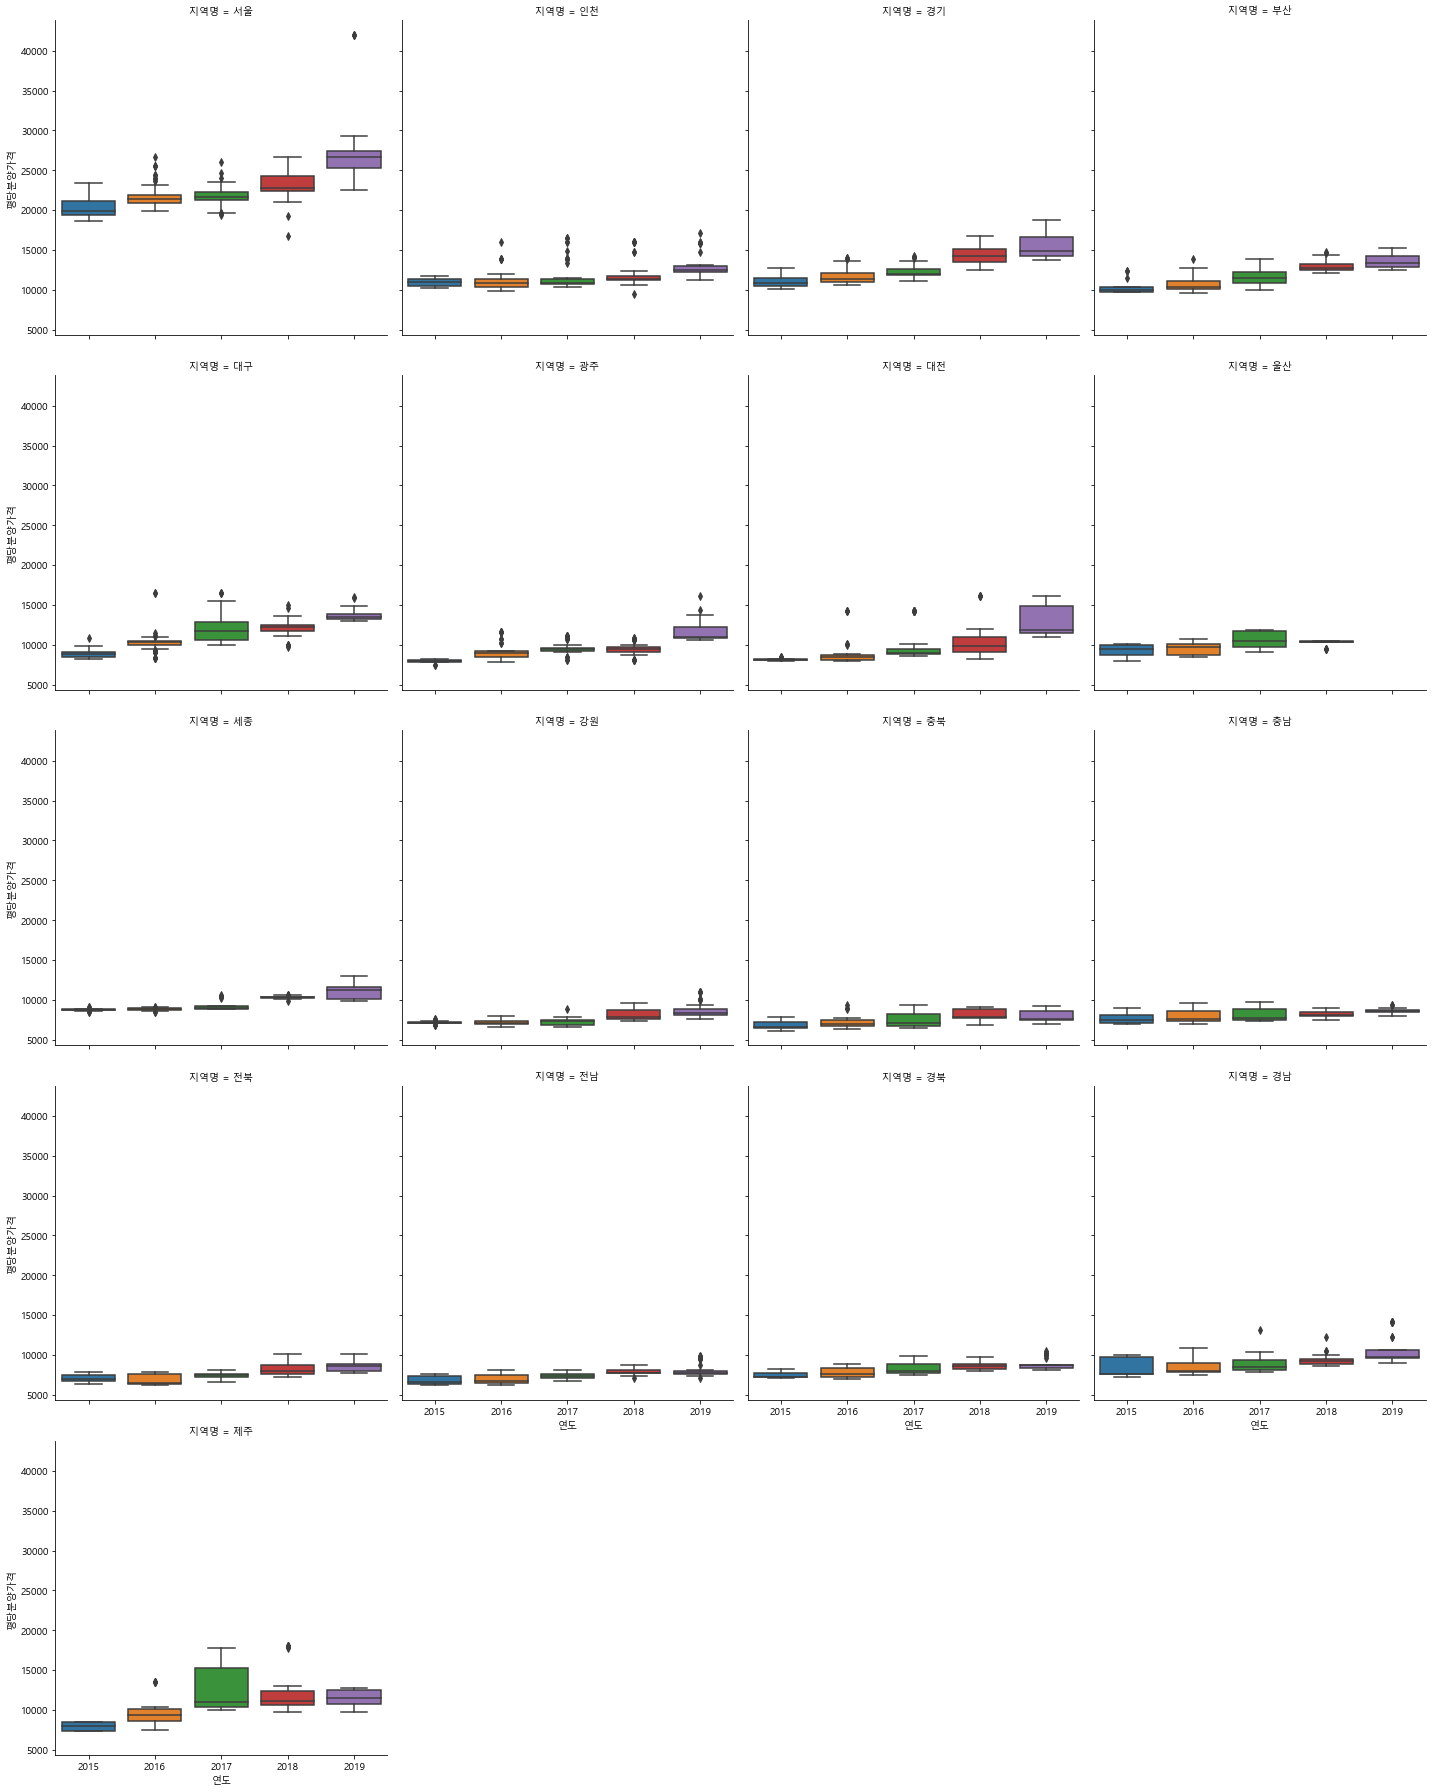

In [90]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.

sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='box',
           col='지역명', col_wrap=4, ci=None)

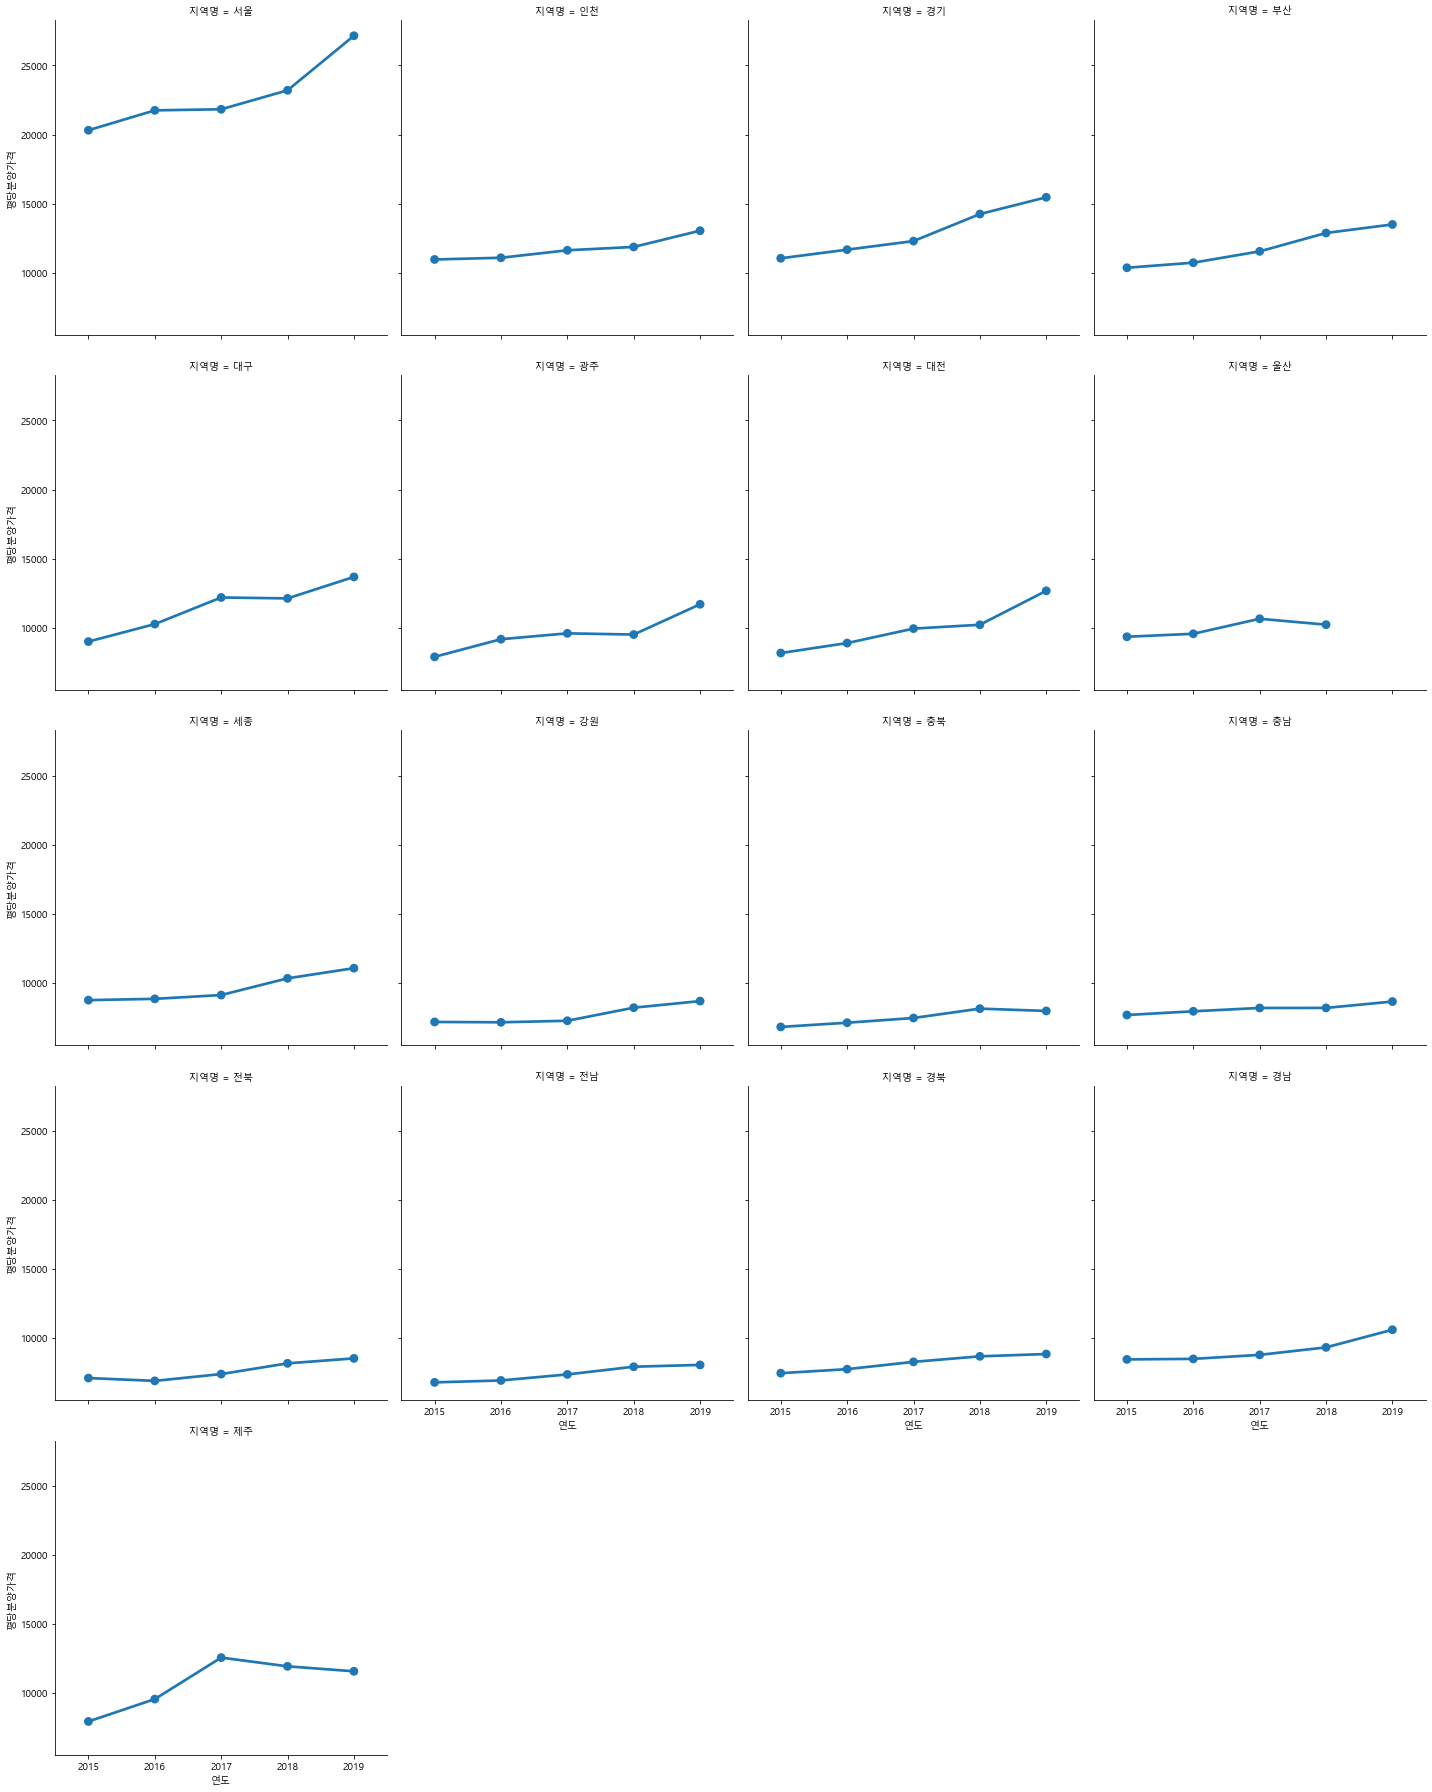

In [89]:
# catplot은 categorical한 plot을 그릴 수 있다.(기본값은 scatter plot)
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='point',
            col='지역명', col_wrap=4, ci=None)

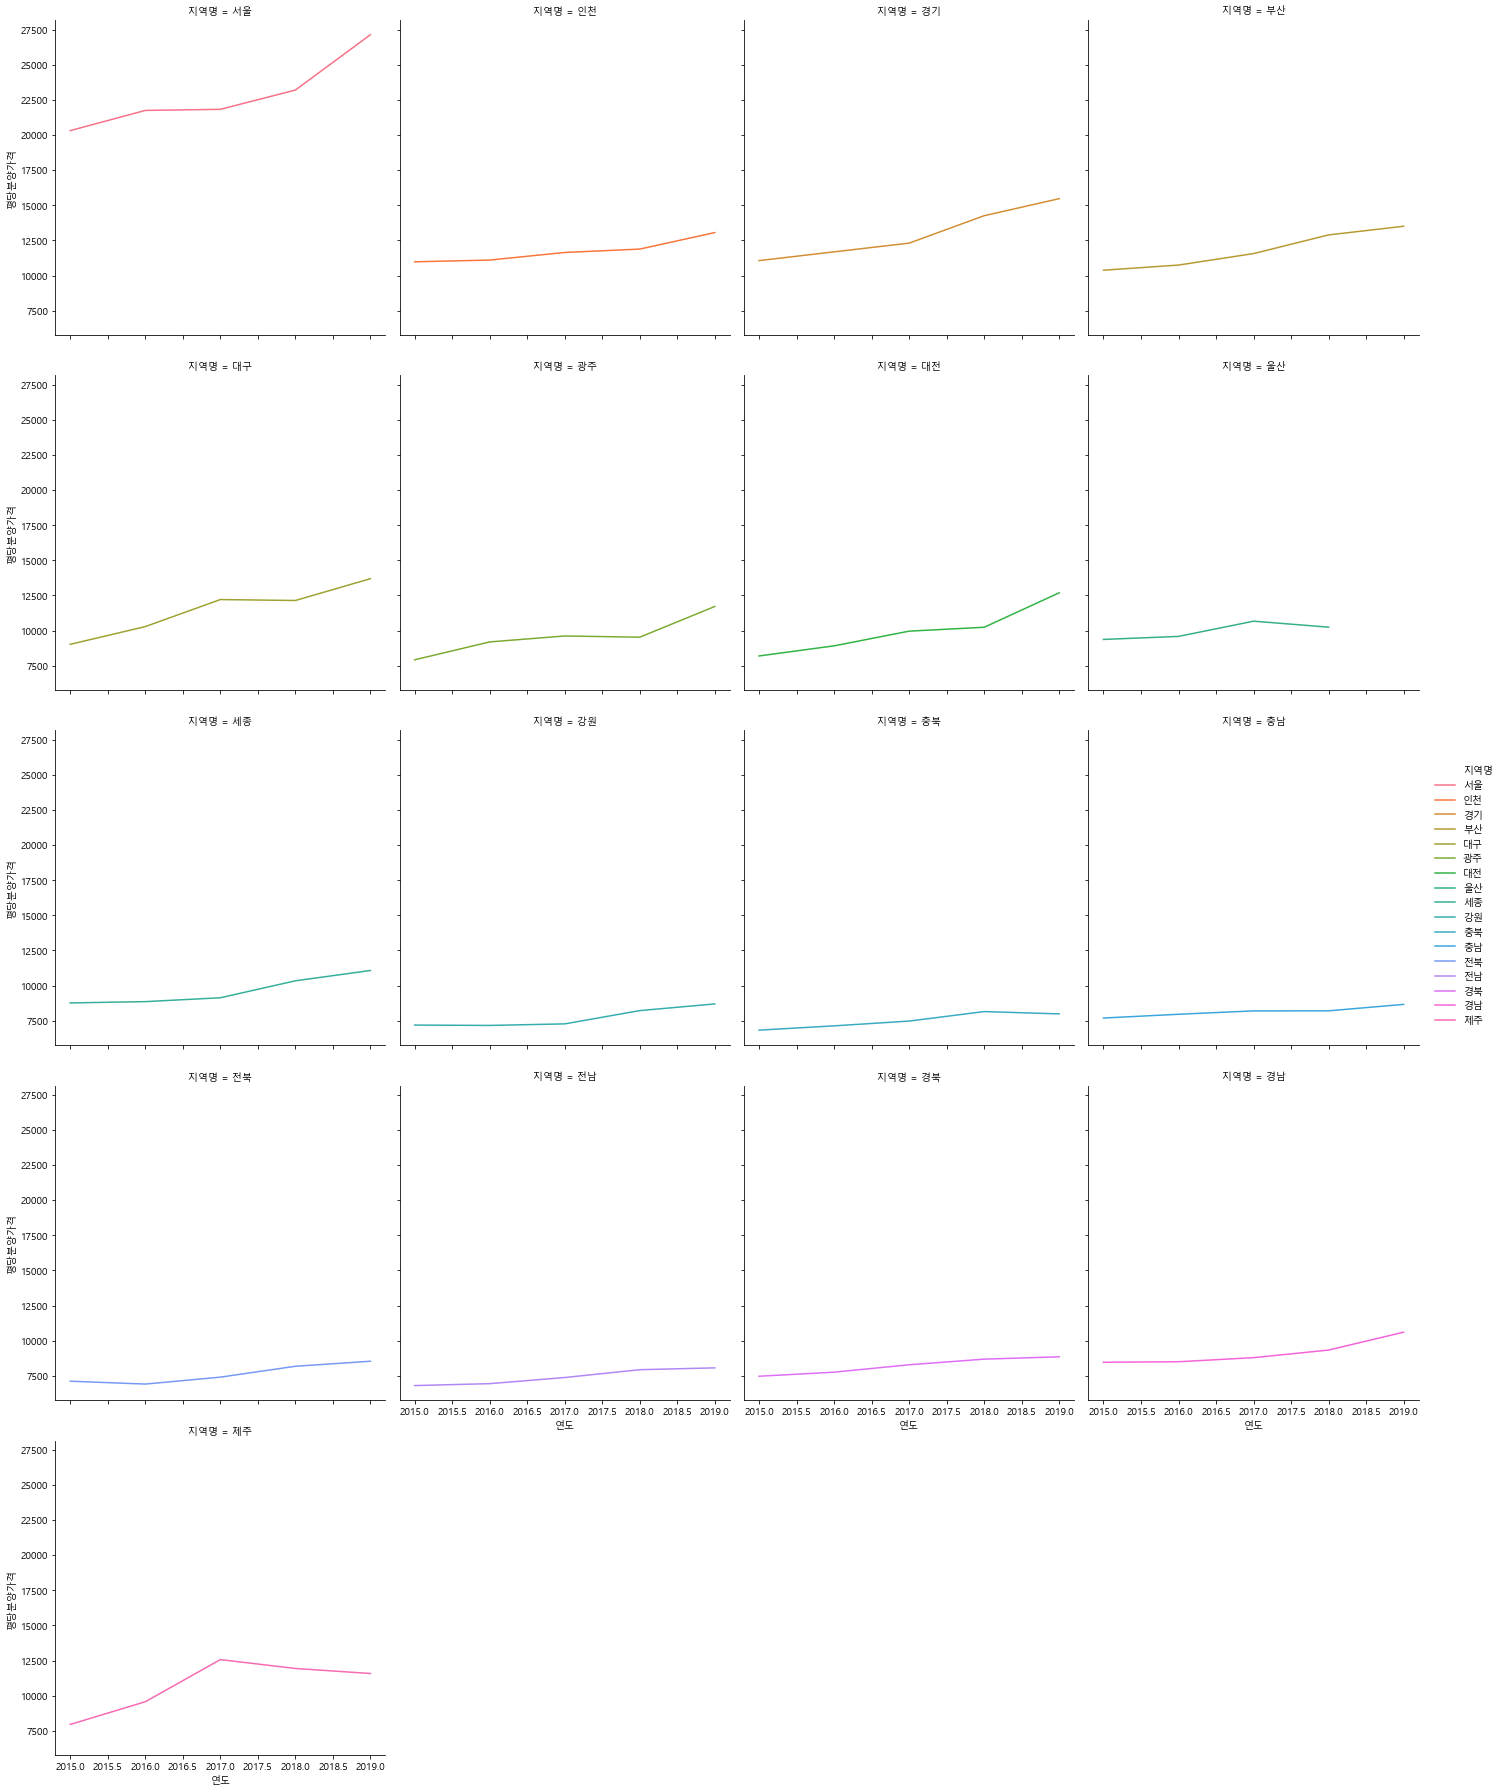

In [94]:
sns.relplot(data=df_last,x='연도',y='평당분양가격',kind='line',col='지역명',col_wrap=4,hue='지역명',ci=None)

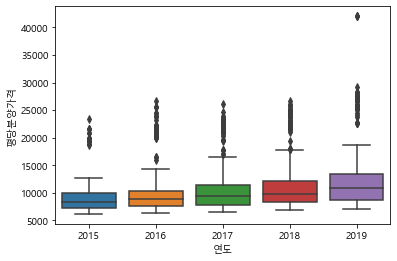

In [95]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

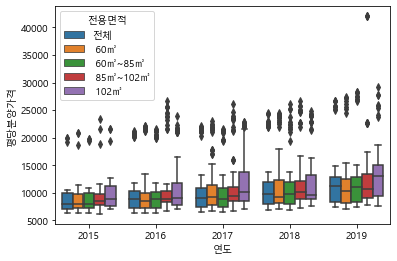

In [96]:
# hue옵션을 주어 전용면적별로 다르게 표시해 봅니다.

sns.boxplot(data=df_last, x='연도', y='평당분양가격',hue='전용면적')

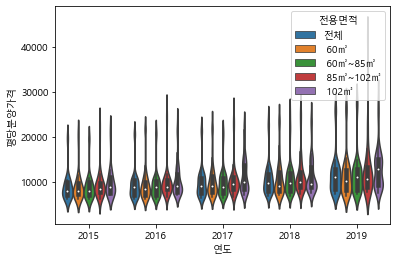

In [98]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.

sns.violinplot(data=df_last,x='연도',y='평당분양가격',hue='전용면적')

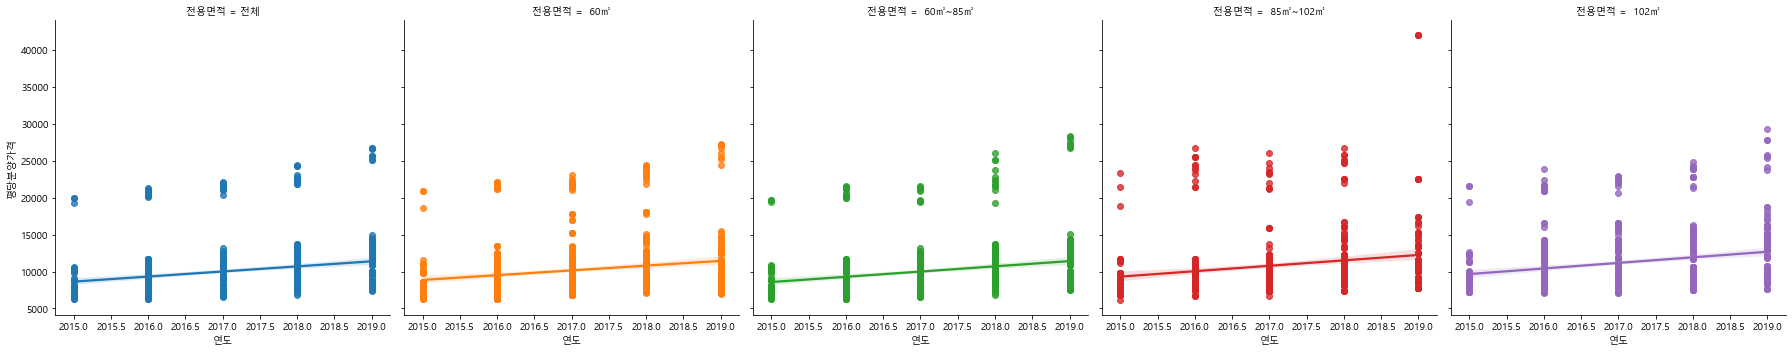

In [101]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(data=df_last, x='연도',y='평당분양가격',hue='전용면적',col='전용면적')

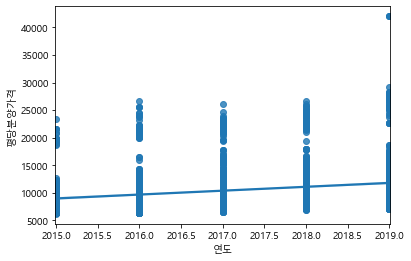

In [104]:
sns.regplot(data=df_last,x='연도',y='평당분양가격')

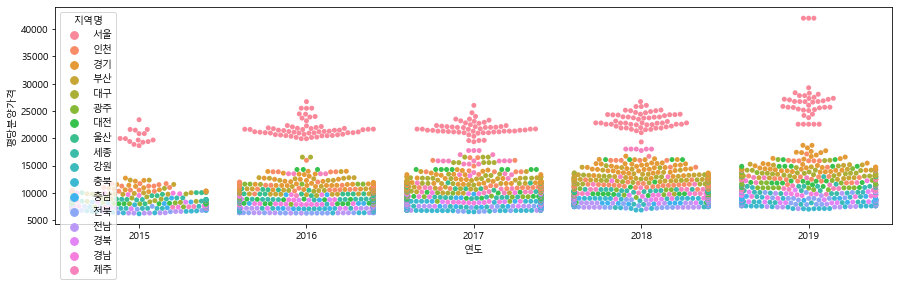

In [108]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_last, x='연도', y='평당분양가격',hue='지역명')

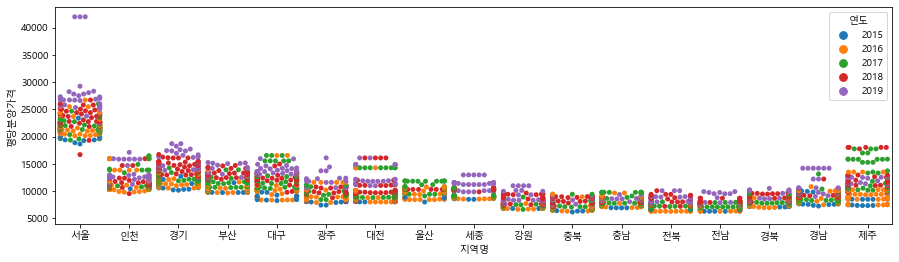

In [109]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_last, x='지역명', y='평당분양가격',hue='연도')

### 이상치 보기

In [112]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.

max_price = df_last['평당분양가격'].max()
max_price

42002.399999999994

In [113]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.

df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

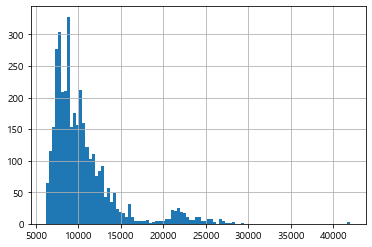

In [116]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]
df_last['평당분양가격'].hist(bins=100)

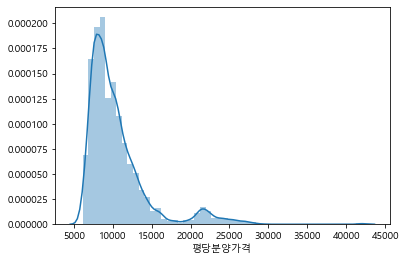

In [135]:
price = df_last.loc[df_last['평당분양가격'].notnull(),'평당분양가격']
sns.distplot(price)

In [136]:
price

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
3989    14199.9
3990    12767.7
3991    12553.2
3992    12817.2
3994    11883.3
Name: 평당분양가격, Length: 3649, dtype: float64

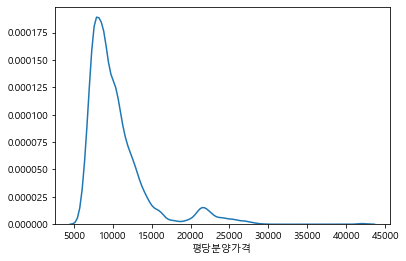

In [137]:
# distplot으로 평당분양가격을 표현해 봅니다.
sns.distplot(price, hist=False)

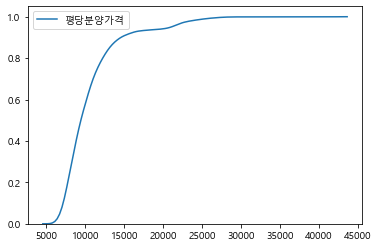

In [138]:
# 값을 누적해서 표현할 수도 있습니다
sns.kdeplot(price, cumulative=True)

In [139]:
# 서울에서 평당분양가격이 결측치가 없는 데이터만 따로 가져옵니다.


In [141]:
# 규모구분(전용면적)별로 value_counts를 사용해서 데이터를 집계해 봅니다.
df_last['지역명'].value_counts()

충남    235
강원    235
경기    235
제주    235
충북    235
전북    235
세종    235
대전    235
전남    235
부산    235
대구    235
광주    235
인천    235
울산    235
서울    235
경북    235
경남    235
Name: 지역명, dtype: int64

In [142]:
df_last['전용면적'].value_counts()

 102㎡        799
 60㎡         799
 60㎡~85㎡     799
 85㎡~102㎡    799
전체           799
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [143]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [145]:
# 결측치가 있는지 봅니다.

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

In [148]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 

df_first_melt = df_first.melt(id_vars='지역', var_name="기간",value_name='평당분양가격')
df_first_melt.head(1)

,지역,기간,평당분양가격
0,서울,2013년12월,18189


In [149]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns

Index(['지역', '기간', '평당분양가격'], dtype='object')

## 연도와 월을 분리하기

In [152]:
date = "2013년12월"
date

'2013년12월'

In [153]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split('년')

['2013', '12월']

In [154]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.
date.split('년')[0]


'2013'

In [156]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.
date.split('년')[-1].replace('월','')


'12'

In [165]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_year(date) :
    year = date.split("년")[0]
    year = int(year)
    return year

In [166]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
parse_year(date)

2013

In [174]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_month(date) :
    month = date.split("년")[-1].replace("월","")
    month = int(month)
    return month

In [175]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.

parse_month(date)

12

In [176]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt.head(2)

,지역,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013


In [179]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head(2)

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


In [180]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
3851,광주,2019,7,3292.0,10863.6,60㎡


In [182]:
# df_last와 컬럼명을 맞춰주기 위해 컬럼의 이름을 
# ["지역명", "연도", "월", "평당분양가격"] 으로 변경합니다.
df_first_melt = df_first_melt[["지역","연도","월","평당분양가격"]].copy()
df_first_melt.columns = ("지역명","연도","월","평당분양가격")
df_first_melt.head(2)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111


In [186]:
cols = df_first_melt.columns.tolist()
cols

['지역명', '연도', '월', '평당분양가격']

In [187]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 컬럼에 담습니다.

df_last_prepare = df_last.loc[df_last['전용면적'] == '전체',cols].copy()
df_last_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [189]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 컬럼에 담습니다.

df_first_prepare = df_first_melt.copy()
df_first_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098


## concat 으로 데이터 합치기

In [192]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.

df = pd.concat([df_first_prepare,df_last_prepare])
df.shape

(1156, 4)

In [194]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [197]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df['연도'].value_counts()

2018    204
2017    204
2016    204
2014    204
2015    187
2019    136
2013     17
Name: 연도, dtype: int64

### pivot_table 사용하기

In [206]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
# pivot은 연산을 하지않고 데이터 형태만 바꿈
# pivot_table은 형태를 바꾸면서 연산까지 같이함
pivot = pd.pivot_table(df, index='연도',
               columns='지역명',
               values='평당분양가격',
               aggfunc='mean')
pivot

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.0000,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.2500,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.6000,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.5000,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7126.800000,11850.000000,8119.800000,7794.900000,9463.500000,11455.800000,9044.700000,11577.900000,21375.9000,9135.300000,11345.100000,10736.700000,7187.700000,7057.800000,10830.900000,7456.200000,6762.600000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.3500,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8103.150000,14357.475000,9663.225000,8582.475000,11479.875000,13552.275000,11752.125000,13102.650000,25916.9625,10912.687500,NaN,12429.862500,7753.350000,8119.650000,11812.350000,8609.287500,7590.412500


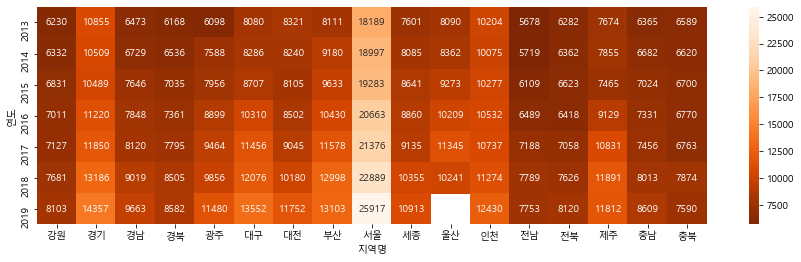

In [213]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
# Blues, Greens, Oranges, RdBu_r
plt.figure(figsize=(15,4))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Oranges_r')

In [215]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

# pivot.T
pivot.transpose()

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.500000,6831.154545,7011.125,7126.8,7680.750,8103.1500
경기,10855.0,10509.083333,10489.109091,11220.000,11850.0,13185.975,14357.4750
경남,6473.0,6728.750000,7646.163636,7847.950,8119.8,9019.450,9663.2250
경북,6168.0,6536.500000,7035.063636,7360.650,7794.9,8505.200,8582.4750
광주,6098.0,7587.833333,7956.090909,8898.725,9463.5,9855.725,11479.8750
대구,8080.0,8286.083333,8706.718182,10310.025,11455.8,12075.800,13552.2750
대전,8321.0,8240.333333,8104.509091,8501.625,9044.7,10180.225,11752.1250
부산,8111.0,9180.166667,9633.272727,10429.925,11577.9,12997.875,13102.6500
서울,18189.0,18997.250000,19282.600000,20663.500,21375.9,22889.350,25916.9625


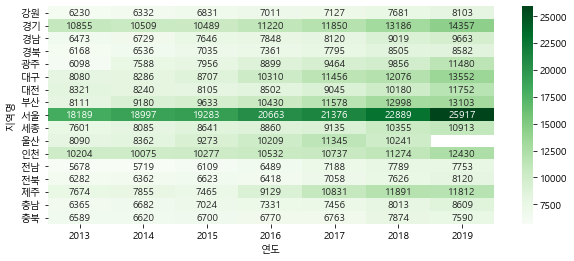

In [219]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.
plt.figure(figsize=(10,4))
sns.heatmap(pivot.T, annot=True, fmt='.0f', cmap='Greens')

In [223]:
# 다른형태의 피봇테이블도 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.
pivot2 = pd.pivot_table(df, index=['연도','지역명'],
               columns='월',
               values='평당분양가격',
               aggfunc='mean')
pivot2

월              1        2        3        4        5        6        7   \
연도   지역명                                                                  
2013 강원       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
     경기       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
     경남       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
     경북       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
     광주       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...           ...      ...      ...      ...      ...      ...      ...   
2019 전남    7966.2   7959.6   7880.4   7623.0   7484.4   7656.0   7722.0   
     전북    7854.0   7873.8   8091.6   7953.0   8147.7   8147.7   8210.4   
     제주   11299.2  11299.2  11299.2  11355.3  11355.3  12355.2  12767.7   
     충남    8127.9   8484.3   8570.1   8609.7   8916.6   8639.4   8811.0   
     충북    7811.1   7550.4   7560.3   7596.6   7580.1   7679.1   7557.0   

월              8   9   10  11       12  
연도   지역명                                
2013 강원       NaN NaN NaN NaN   6230.0  
     경기       NaN NaN NaN NaN  10855.0  
     경남       NaN NaN NaN NaN   6473.0  
     경북       NaN NaN NaN NaN   6168.0  
     광주       NaN NaN NaN NaN   6098.0  
...           ...  ..  ..  ..      ...  
2019 전남    7735.2 NaN NaN NaN      NaN  
     전북    8679.0 NaN NaN NaN      NaN  
     제주   12767.7 NaN NaN NaN      NaN  
     충남    8715.3 NaN NaN NaN      NaN  
     충북    7388.7 NaN NaN NaN      NaN  

[118 rows x 12 columns]

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

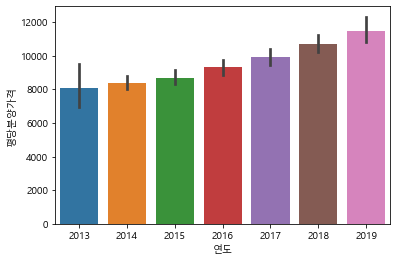

In [220]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x='연도', y='평당분양가격')

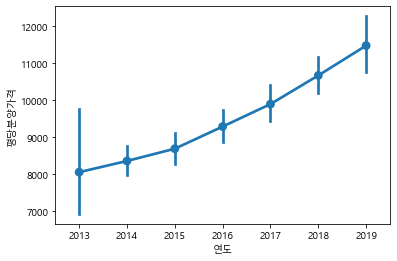

In [224]:
# pointplot 으로 연도별 평당분양가격 그리기
sns.pointplot(data=df, x='연도', y='평당분양가격')

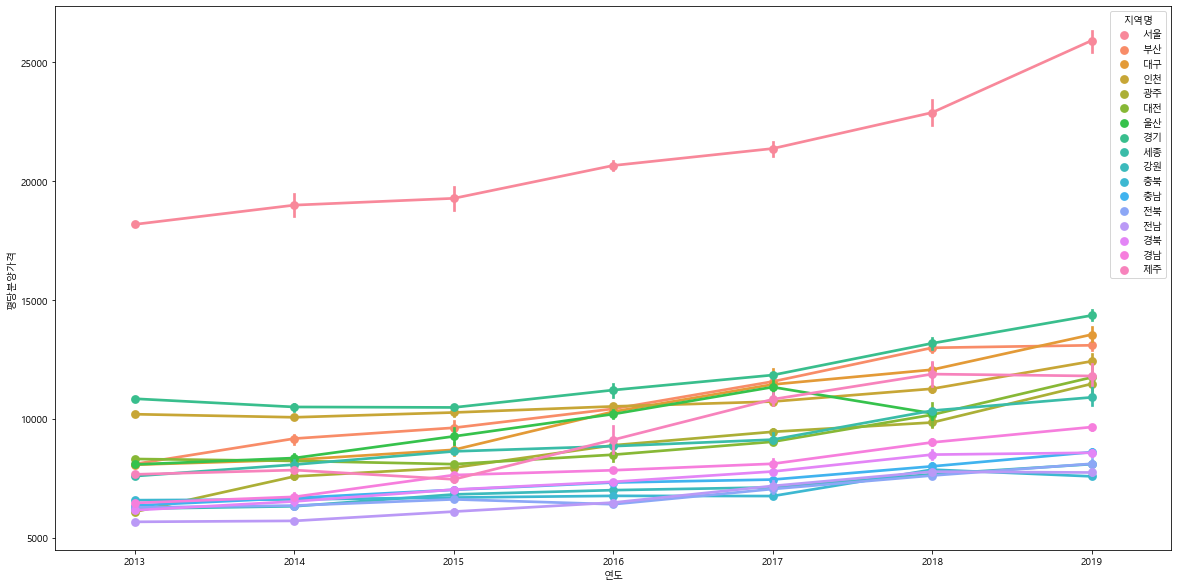

In [228]:
# pointplot 으로 연도별 평당분양가격 그리고 지역별로 표현해 보기
plt.figure(figsize=(20,10))
sns.pointplot(data=df, x='연도', y='평당분양가격',hue='지역명')

In [ ]:
# 서울만 barplot 으로 그리기


In [ ]:
# 연도별 평당분양가격 boxplot 그리기


In [ ]:
# 연도별 평당분양가격 violinplot 그리기


In [ ]:
# 연도별 평당분양가격 swarmplot 그리기


### 지역별 평당분양가격 보기

In [ ]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.


In [ ]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.


In [ ]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
# 그래프의 사이즈를 조정하기 위해서는 
# matplotlib의 pyplot을 사용하며 plt 라는 별칭으로 불러왔습니다.


In [ ]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
